## Evolution of a system of coupled scalar waves in 1D

$$\dfrac{d\phi}{dt} = \mu$$

$$\dfrac{d\mu}{dt} = c^{2}_{\phi} \dfrac{d^2\phi}{dx^2}$$

$$\dfrac{d\zeta}{dt} = \nu - \gamma(\zeta - \phi)$$

$$\dfrac{d\nu}{dt} = c^{2}_{\zeta} \dfrac{d^2\zeta}{dx^2}$$

where, $\gamma$ is the coupling factor/stiffness parameter

With initial conditions:

$$ \phi(x,t) = \phi(x,0) = \exp \left(-\dfrac{(x-1)}{\sigma}\right)^2 $$

$$ \dfrac{d \phi}{dt} (x,0) = \mu(x,0) = 0 $$

$$ \zeta(x,t) = \zeta(x,0) = \exp \left(-\dfrac{(x-1)}{\sigma}\right)^2 $$

$$ \dfrac{d \zeta}{dt} (x,0) = \nu(x,0) = 0 $$

and boundary conditions:

$$ \phi(x,t) = \phi(x + L,t), 0 \leq x \leq 2 $$
$$ \zeta(x,t) = \zeta(x + L,t), 0 \leq x \leq 2 $$

### IMEX Midpoint method - (s,$\sigma$,p) = (1,2,2) documentation


$$u_{n+1} = u_0 + h(g(u_1) + f(u_1)) $$

where $g(u_1) = \dfrac{u_1 - \beta_m}{\alpha}$.

Define:
$$G(u_1): u_1 -\alpha g(u_1) - \beta_m = 0$$

Here,
$$\alpha = \frac{h}{2}$$

$$\beta_m = u_0 + \frac{h}{2}f(u_0)$$
$m =1,2,3... \rightarrow$ denotes variable.

User is required to solve function $G(u_1)$ for variables $u_1$ analytically.

### IMEX ARS(3,4,3) method - (s,$\sigma$,p) = (3,4,3) documentation

The explicit Butcher tableau is(with $s$ stages):

| $\hat{c}$                       | $\hat{a}$   |          |           |           |
|-----------                      |-------------|----------|-----------|-----------|
| $0_1$                           | $0_{11}$    | $0_{12}$ | $0_{13}$  | $0_{14}$  |
| $\Gamma_2$                      | $\Gamma_{21}$     | $0_{22}$ | $0_{23}$  | $0_{24}$  |
| $\frac{1+\Gamma}{2}_3$          | $\left( \frac{1+\Gamma}{2} - \eta\right)_{31}$    | $\eta_{32}$ | $0_{33}$  | $0_{34}$  |
| $1_4$                           | $(1-2\mu)_{41}$    | $\mu_{42}$ | $\mu_{43}$  | $0_{44}$  |
| $\hat{b}$                       | $0_{1}$    | $(1-\delta-\Gamma)_{2}$ | $\delta_{3}$  | $\Gamma_{4}$  |


And the implicit Butcher tableau which on padding results in the following ($\sigma = s+1$ stages):

| $c$ | $a$   |          |           |           |
|-----------|-------------|----------|-----------|-----------|
| $0_0$     | $0_{00}$    | $0_{01}$ | $0_{02}$  | $0_{03}$  |
| $\Gamma_1$     | $0_{10}$    | $\Gamma_{11}$ | $0_{12}$  | $0_{13}$  |
| $\frac{1+\Gamma}{2}_2$     | $0_{20}$    | $\frac{1+\Gamma}{2}_{21}$ | $\Gamma_{22}$  | $0_{23}$  |
| $1_3$     | $0_{30}$    | $(1-\delta-\Gamma)_{31}$ | $\delta_{32}$  | $\Gamma_{33}$  |
| $b$     | $0_{0}$    | $(1-\delta-\Gamma)_{1}$ | $\delta_{2}$  | $\Gamma_{3}$  |

where $\Gamma = 0.4358665215$, $\delta = -0.644373171$, $\eta = 0.3966543747$, $\mu = 0.5529291479$.

<br/><br/>

For $i = 1,2,...s$, 

$K_{i} = g(u_i)$ and  $\hat{K_{i+1}} = f(u_i)$,

where,

$$u_i = u_0 + h \sum_{j=1}^{i} a_{i,j} K_j + h \sum_{j=1}^{i} \hat{a_{i,j}} \hat{K_j} $$

$$ u_1 = u_0 + h \left( a_{11}g(u_1) + \hat{a_{21}}f(u_0) \right), \\
 u_2 = u_0 + h \left( a_{21}g(u_1) + a_{22}g(u_2) + \hat{a_{31}}f(u_0) + \hat{a_{32}}f(u_1) \right), \\
 u_3 = u_0 + h \left( a_{31}g(u_1) + a_{32}g(u_2) + a_{33}g(u_3) + \hat{a_{41}}f(u_0) + \hat{a_{42}}f(u_1) + \hat{a_{43}}f(u_2) \right). $$
 
Define:

$$ \boxed{ \beta_{1,m} = u_0 + h(\hat{a_{21}}f(u_0)), \ \alpha_1 = a_{11}h \\
\beta_{2,m} = u_0 + h(a_{21}g(u_1) + \hat{a_{31}}f(u_0) + \hat{a_{32}}f(u_1)), \ \alpha_2 = a_{22}h \\
\beta_{3,m} = u_0 + h(a_{31}g(u_1) + a_{32}g(u_2) + \hat{a_{41}}f(u_0) + \hat{a_{42}}f(u_1) + \hat{a_{43}}f(u_2) ), \ \alpha_3 = a_{33}h .}$$

Hence,

$$ \boxed{ G(u_i) : u_i - \beta_{i,m} -\alpha_i g(u_i) = 0}$$


$i = 1,2,3$ and $m =1,2,3... \rightarrow$ denotes variable.
User is required to solve the function $G(u)$ for variable $u$ analytically.

Finally,

$$u_{n+1} = u_0 + h \sum_{j=1}^{s} b_j K_j +  h \sum_{j=1}^{\sigma} \hat{b_j} \hat{K_j}$$

For $s=3, \sigma = 4$,

$$\boxed {\Rightarrow u_{n+1} = u_0 + h(b_1 g(u_1) + b_2 g(u_2) + b_3 g(u_3) +
\hat{b_1}f(u_0) + \hat{b_2}f(u_1) + \hat{b_3}f(u_2) + \hat{b_4}f(u_3)). } $$

where $g(u_1) = \dfrac{u_1 - \beta_{1,m}}{\alpha_1},\ g(u_2) = \dfrac{u_2 - \beta_{2,m}}{\alpha_2},\ g(u_3) = \dfrac{u_3 - \beta_{3,m}}{\alpha_3}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Physics
x_start = 0
x_length = 2.0
t_start = 0
t_end = 50
wave_speed_phi = 0.9
wave_speed_zeta = 1.0
stiffness = 2E+10

In [3]:
Nx = 200 #+1 to include 0 as a point
Nghost = 2
#CFL condition: dt < alpha*dx/c
Courant_factor = 0.1

In [4]:
def compute_dt(cf,dx,c):
    dt = (cf*dx)/c
    return dt

In [5]:
dx = (x_start + x_length)/Nx
var_x = np.arange(x_start,x_start + x_length,dx) #End point not included for periodic/circular system
dt = compute_dt(Courant_factor,dx,np.amax([wave_speed_zeta,wave_speed_phi])) # wave speed of zeta or phi??????????
var_t = np.arange(t_start,t_end+dt,dt)
Nt = len(var_t)
print('Time step size = %.8f,\nSpatial resolution = %.4f'%(dt,dx))

Time step size = 0.00100000,
Spatial resolution = 0.0100


In [6]:
##----------------------------Second order finite difference method--------------------------------##
def second_derivative_CFD2(var,dx):
    D2_var = np.zeros(len(var))
    var_with_ghosts = exterior_points_CFD2(var)
    for i in range (1,len(var_with_ghosts)-1): # calculates only interior
        # Central finite difference method:
        D2_var[i-1] = (var_with_ghosts[i-1] - 2*var_with_ghosts[i] + var_with_ghosts[i+1])/dx**2
    return D2_var

def exterior_points_CFD2(var):
    var_left_ghost = np.append(var[len(var)-1],var)
    var_ghosts = np.append(var_left_ghost,var[0])
    return var_ghosts

##----------------------------Fourth order finite difference method--------------------------------##
#Ref: https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf
def second_derivative_CFD4(var,dx):
    D2_var = np.zeros(Nx)
    var_with_ghosts = exterior_points_CFD4(var)
    for i in range (2,len(var_with_ghosts)-2):
        # Central finite difference method:
        D2_var[i-2] = (-var_with_ghosts[i+2] + 16*var_with_ghosts[i+1] - 30*var_with_ghosts[i]
                       + 16*var_with_ghosts[i-1] - var_with_ghosts[i-2]  )/(12*dx**2)
    return D2_var

def exterior_points_CFD4(var):
    var_l1_ghost = np.append(var[len(var)-1],var)
    var_l2_ghost = np.append(var[len(var)-2],var_l1_ghost)
    var_r1_ghost = np.append(var_l2_ghost,var[0])
    var_r2_ghost = np.append(var_r1_ghost,var[1])
    var_ghosts = var_r2_ghost
    return var_ghosts

In [7]:
##------------Explicit Time integrators------------------------------##

def RK2(rhs,u_n,dt):
    k1 = np.array(rhs(u_n))
    k2 = np.array(rhs(u_n + (dt/2)*k1))
    u_np1 = u_n + dt*k2
    return u_np1

def RK4(rhs,u_n,dt):
    k1 = np.array(rhs(u_n))
    k2 = np.array(rhs(u_n + (dt/2)*k1))
    k3 = np.array(rhs(u_n + (dt/2)*k2))
    k4 = np.array(rhs(u_n + dt*k3))
    u_np1 = u_n + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return u_np1


##--------------------IMEX(1,2,2) Method-----------------------------##

def IMEX_midpoint_122(f,G,u0,dt):
    k1_hat = np.array(f(u0))
    alpha = dt/2
    beta = u0 + alpha*k1_hat
    u1 = np.array(G(alpha,beta))
    k2_hat = np.array(f(u1))
    k1 = np.array( (u1-beta)/alpha )
    u_np1 = u0 + dt*k2_hat + dt*k1
    return u_np1

##--------------------IMEX(3,4,3) Method------------------------------##

# Define Butcher table elements
#------------------------------------------------------------#
def implicit_butcher_table_a(i,j):
    Gamma = 0.4358665215
    delta = -0.644373171
    eta = 0.3966543747
    mu = 0.5529291479
    a_imp = np.array([[0,0,0,0],
                  [0,Gamma,0,0],
                  [0,(1 - Gamma)/2,Gamma,0],
                  [0,(1-Gamma-delta),delta,Gamma]])
    return a_imp[i,j]
def explicit_butcher_table_a_hat(i,j):
    i,j = (i-1),(j-1)
    Gamma = 0.4358665215
    delta = -0.644373171
    eta = 0.3966543747
    mu = 0.5529291479
    a_exp = np.array([[0,0,0,0],
                  [Gamma,0,0,0],
                  [((1 + Gamma)/2) - eta,eta,0,0],
                  [(1-2*mu),mu,mu,0]])
    return a_exp[i,j]

def implicit_b(i):
    Gamma = 0.4358665215
    delta = -0.644373171
    eta = 0.3966543747
    b = np.array([0,(1-Gamma-delta),delta,Gamma])
    return b[i]

def explicit_b(i):
    i = i - 1
    Gamma = 0.4358665215
    delta = -0.644373171
    eta = 0.3966543747
    b = np.array([0,(1-Gamma-delta),delta,Gamma])
    return b[i]

#------------------------------------------------------------#


def IMEX_343(f,G,a,a_hat,b,b_hat,u0,h):
    #--------------Stage 1----------------#
    k1_hat = np.array(f(u0))
    alpha_1 = h*a(2,2)
    beta_1 = u0 + h*a_hat(2,1)*k1_hat
    u1 = np.array(G(alpha_1,beta_1)) 
    #--------------Stage 2----------------#
    k1 = np.array( (u1-beta_1)/alpha_1 ) #g(u_1)
    k2_hat = np.array(f(u1))
    alpha_2 = h*a(2,2)
    beta_2 = u0 + h*( a(2,1)*k1 + a_hat(3,1)*k1_hat + a_hat(3,2)*k2_hat )
    u2 = np.array(G(alpha_2,beta_2))
    #--------------Stage 3----------------#
    k2 = np.array( (u2-beta_2)/alpha_2 ) #g(u_2)
    k3_hat = np.array(f(u2))
    alpha_3 = h*a(3,3)
    beta_3 = u0 + h*( a(3,1)*k1 + a(3,2)*k2 + a_hat(4,1)*k1_hat 
                     + a_hat(4,2)*k2_hat + a_hat(4,3)*k3_hat )
    u3 = np.array(G(alpha_3,beta_3))
    #-------------------------------------#
    k3 = np.array( (u3-beta_3)/alpha_3 ) #g(u_3)
    k4_hat = np.array(f(u3))
    u_np1 = u0 + h*( b(1)*k1 + b(2)*k2 + b(3)*k3 +
                   b_hat(1)*k1_hat + b_hat(2)*k2_hat + b_hat(3)*k3_hat + b_hat(4)*k4_hat )
    return u_np1

##------------------------------------------------------------------------##

In [8]:
def numerical_method_flags(time_integration_method,finite_difference_method):
    global FD_method,TI_method, RHS_func
    if (finite_difference_method == "CFD2"):
        FD_method = second_derivative_CFD2
    if (finite_difference_method == "CFD4"):
        FD_method = second_derivative_CFD4
    if (time_integration_method == "RK2"):
        TI_method = RK2
        RHS_func = lambda u_n,FD_method,dx: (scalar_wave_RHS_f(u_n,FD_method,dx) + scalar_wave_RHS_g(u_n,FD_method,dx))
    if (time_integration_method == "RK4"):
        TI_method = RK4
        RHS_func = lambda u_n,FD_method,dx: (scalar_wave_RHS_f(u_n,FD_method,dx) + scalar_wave_RHS_g(u_n,FD_method,dx))
    if (time_integration_method == "IMEX-midpoint(1,2,2)"):
        TI_method = lambda rhs,u_n,dt: IMEX_midpoint_122(rhs,IMEX_G,u_n,dt)
        RHS_func = lambda u_n,FD_method,dx: scalar_wave_RHS_f(u_n,FD_method,dx)
    if (time_integration_method == "IMEX-ARS(3,4,3)"):
        TI_method = lambda rhs,u_n,dt: IMEX_343(rhs,IMEX_G,implicit_butcher_table_a,
                                                explicit_butcher_table_a_hat,implicit_b,explicit_b,
                                               u_n,dt)
        RHS_func = lambda u_n,FD_method,dx: scalar_wave_RHS_f(u_n,FD_method,dx)

In [9]:
def Evolve(init,rhs,time_integration_method,Nt,dt):
    global comp_time
    u_0 = init()
    u_result = np.zeros((len(var_t),len(u_0),Nx)) #u_result[i][j][k]; i -> time, j-> variable, k-> x position
    print("Total iteration = %d"%(Nt-1))
    start_time = time.time()
    u_result[0] = np.array((u_0))
    for i in range (1,Nt):
        u_np1 = np.array(time_integration_method(rhs,u_0,dt))
        #store result of iteration
        u_result[i] = u_np1
        #update values
        u_0 = u_np1
    end_time = time.time()
    comp_time = end_time - start_time
    print("Computation time: %f seconds"%(comp_time))
    return u_result

In [10]:
#RHS expressions

#Note: Split the RHS terms into two parts.
#      Non-stiff terms are defined in "scalar_wave_RHS_f" rountine and
#      stiff terms are defined in "scalar_wave_RHS_g" routine.


# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
def scalar_wave_RHS_f(u_n,second_derivative,dx):
    phi = u_n[0]
    mu = u_n[1]
    zeta = u_n[2]
    nu = u_n[3]
    phi_dot = mu
    del_square_phi = second_derivative(phi,dx)
    del_square_zeta = second_derivative(zeta,dx)
    mu_dot = (wave_speed_phi**2)*del_square_phi
    zeta_dot = nu
    nu_dot = (wave_speed_zeta**2)*del_square_zeta 
    u_rhs_f = np.array((phi_dot,mu_dot,zeta_dot,nu_dot))
    return u_rhs_f

def scalar_wave_RHS_g(u_n,second_derivative,dx):
    phi = u_n[0]
    mu = u_n[1]
    zeta = u_n[2]
    nu = u_n[3]
    phi_dot = np.zeros(Nx) # if var=0, use np.zeros(Nx)
    zeta_dot = - stiffness*(zeta - phi)
    mu_dot = np.zeros(Nx)
    nu_dot = np.zeros(Nx)
    u_rhs_g = np.array((phi_dot,mu_dot,zeta_dot,nu_dot))
    return u_rhs_g

##------------------IMEX----------------------------##
# Solve the system of equations defined by G(u_1) analytically using
# Mathematica or sympy and define them in the routine "IMEX_G".
def IMEX_G(alpha,beta):
    phi_1 = beta[0]
    mu_1 = beta[1]
    zeta_1 = (beta[2] + alpha*stiffness*phi_1)/(1 + alpha*stiffness)
    nu_1 = beta[3]
    u1 = np.array((phi_1,mu_1,zeta_1,nu_1))
    return u1
##------------------IMEX----------------------------##

In [11]:
# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
def initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,dx):
    var_phi = expr_phi(var_x)
    var_mu = expr_mu(var_x)
    var_zeta = expr_zeta(var_x)
    var_nu = expr_nu(var_x)
    return np.array([var_phi,var_mu,var_zeta,var_nu])

In [12]:
# Initial condition for phi,zeta at t=0
sigma = 0.1
expr_phi = lambda x: np.exp(-((x-1)/sigma)**2)
expr_zeta = lambda x: np.exp(-((x-1)/sigma)**2)
#Initial condition for d/dt(phi) = mu,d/dt(zeta) = nu at t=0
expr_mu = lambda x: 0*x
expr_nu = lambda x: 0*x

In [13]:
#Evolve variables in time

#Specify available time integration method:
#- Explicit: 'RK2' or 'RK4',
#- Implicit-Explicit: 'IMEX-midpoint(1,2,2)' or 'IMEX-ARS(3,4,3)'

# Specify available Finite Difference method: 
#- Central Finite Difference: 'CF2' or 'CF4'

time_integration_method = "IMEX-ARS(3,4,3)" 
finite_difference_method = "CFD4" 
numerical_method_flags(time_integration_method,finite_difference_method)

u_Nsoln = Evolve(lambda: initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,dx),
                  lambda u_n: RHS_func(u_n,FD_method,dx),TI_method,Nt,dt)

Total iteration = 50000
Computation time: 371.502347 seconds


In [14]:
#----------- End of numerical solution computation-----------------#

0


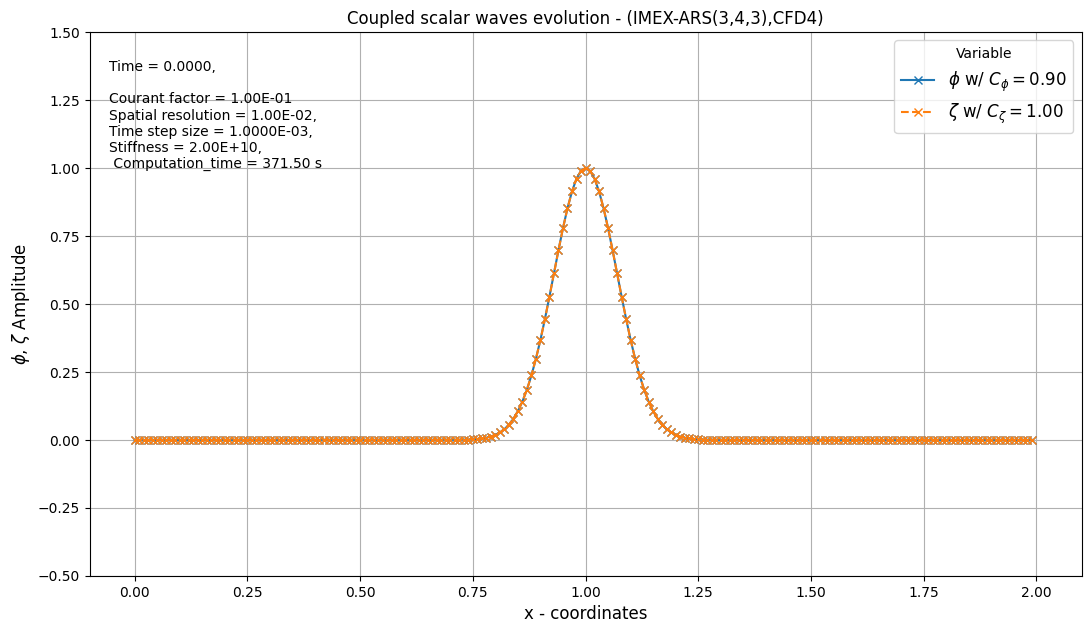

10000


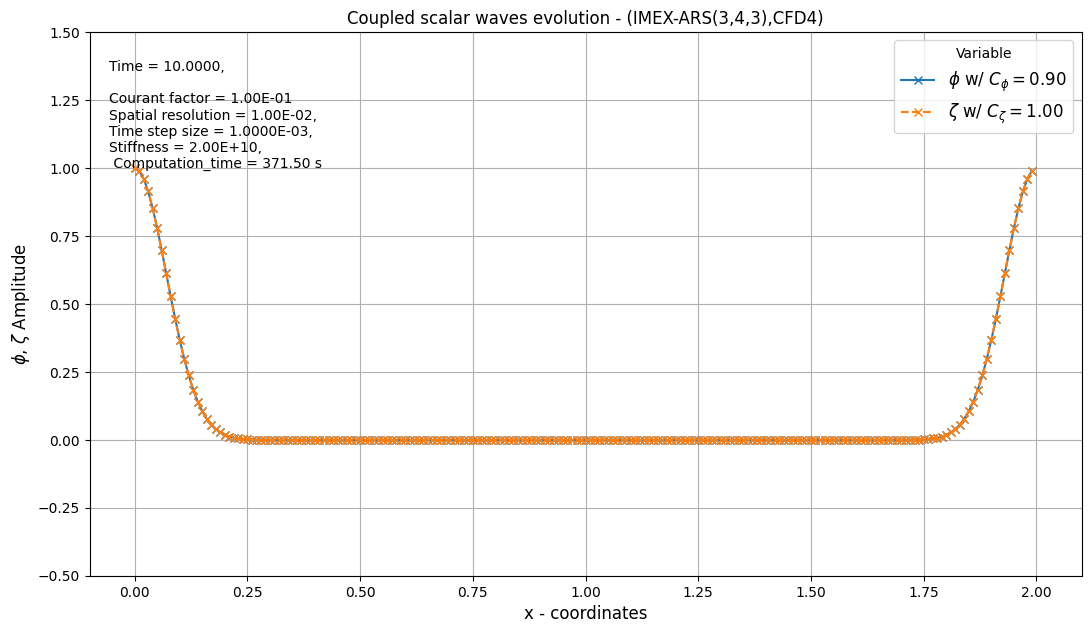

20000


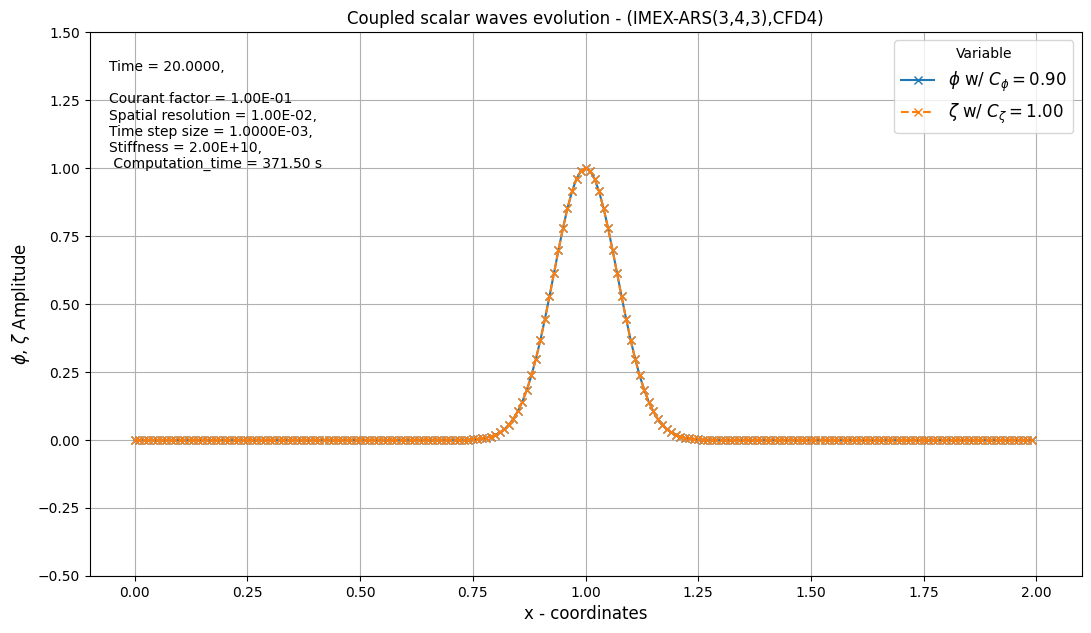

30000


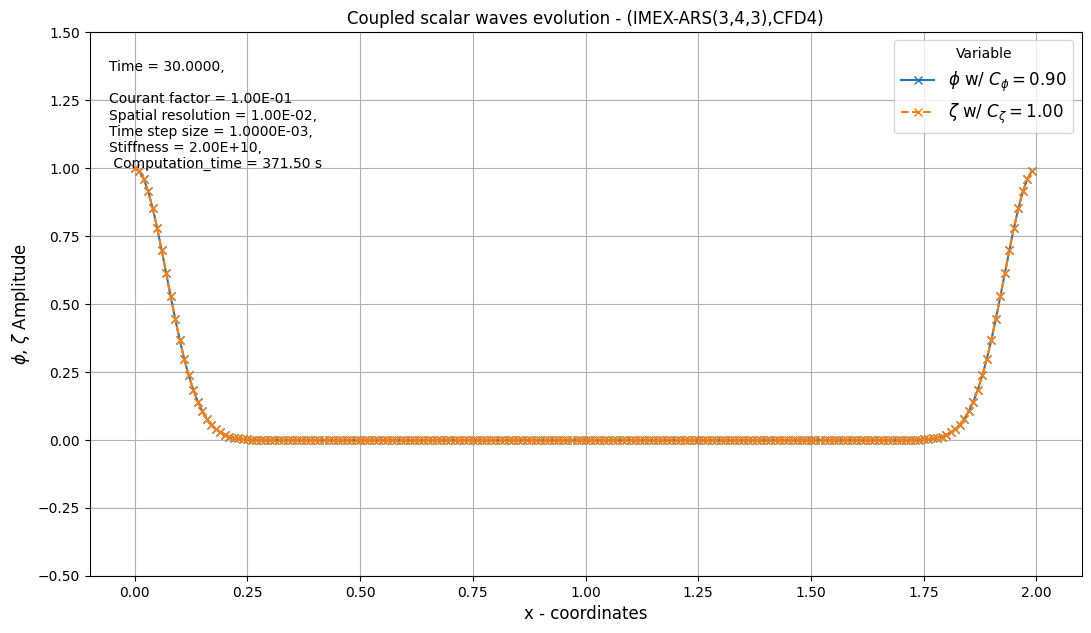

40000


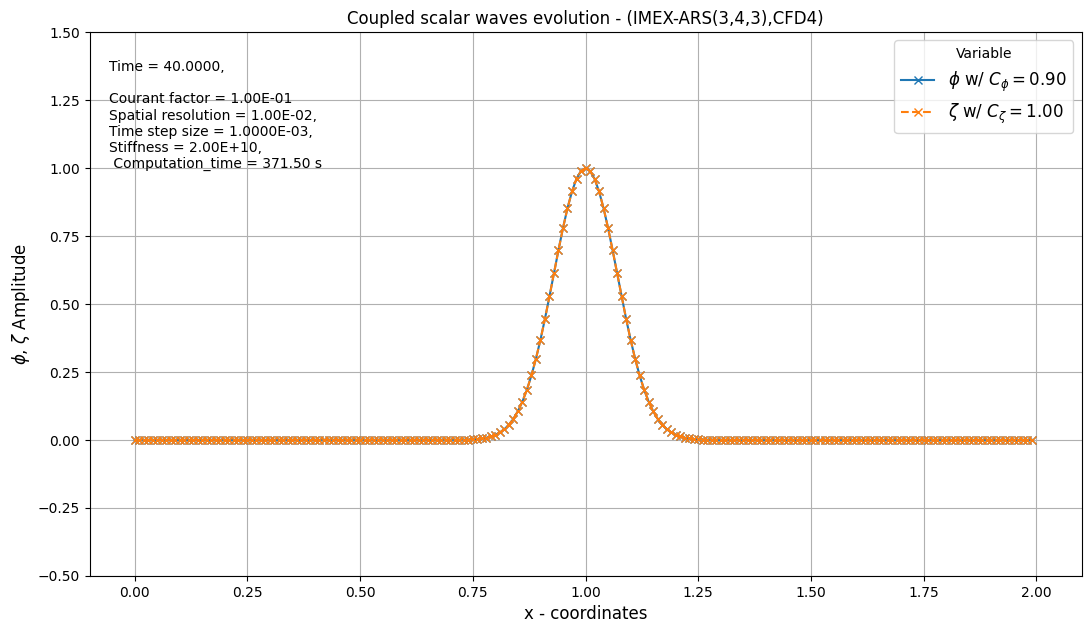

50000


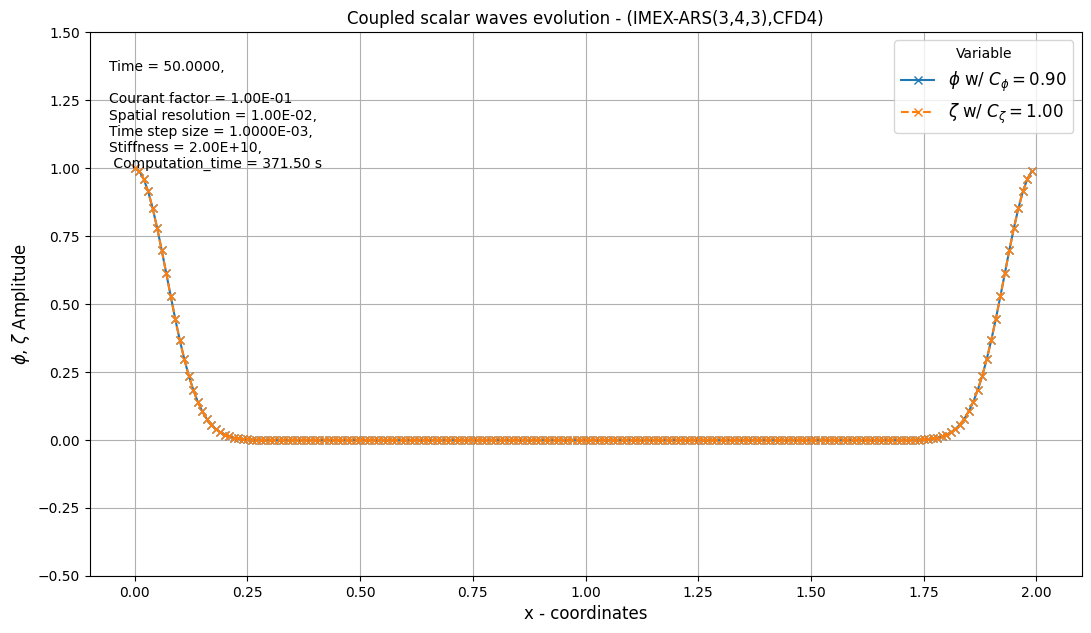

In [15]:
# Quick analysis & plots
# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
phi_Nsoln = u_Nsoln[:,0]
zeta_Nsoln = u_Nsoln[:,2]

# Plot evolution of wave function
###-------------------------------------------------###
def plot_evolution(title,x_label,y_label,x_param,y_param1,y_param2,i):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    ax.axis([-0.1,2.1,-0.5,1.5])
    plt.plot(x_param,y_param1,'-x')
    plt.plot(x_param,y_param2,'--x')
    plt.grid(axis="both")
    plt.legend([r'$\phi$ w/ $C_{\phi}=%0.2f$'%wave_speed_phi,r'$\zeta$ w/ $C_{\zeta}=%0.2f$'%wave_speed_zeta],
               title="Variable",loc='upper right',fontsize=12)
    plt.text(0.02, 0.75,
             'Time = %.4f,\n\nCourant factor = %0.2E\nSpatial resolution = %.2E,\nTime step size = %.4E,\nStiffness = %.2E,\n Computation_time = %.2f s'
             %(var_t[i],Courant_factor,dx,dt,stiffness,comp_time),transform=ax.transAxes)
    plt.show()

plots_to_generate = 5
for i in range (0,Nt,int(Nt/plots_to_generate)):
    print(i)
    plot_evolution('Coupled scalar waves evolution - (%s,%s)'%(time_integration_method,finite_difference_method),
                   "x - coordinates",r'$\phi$, $\zeta$ Amplitude',
                   var_x,phi_Nsoln[i,:],zeta_Nsoln[i,:],i)
###--------------------------------------------------###

Exact crossing time does not exists. t[end_point]=2.2220


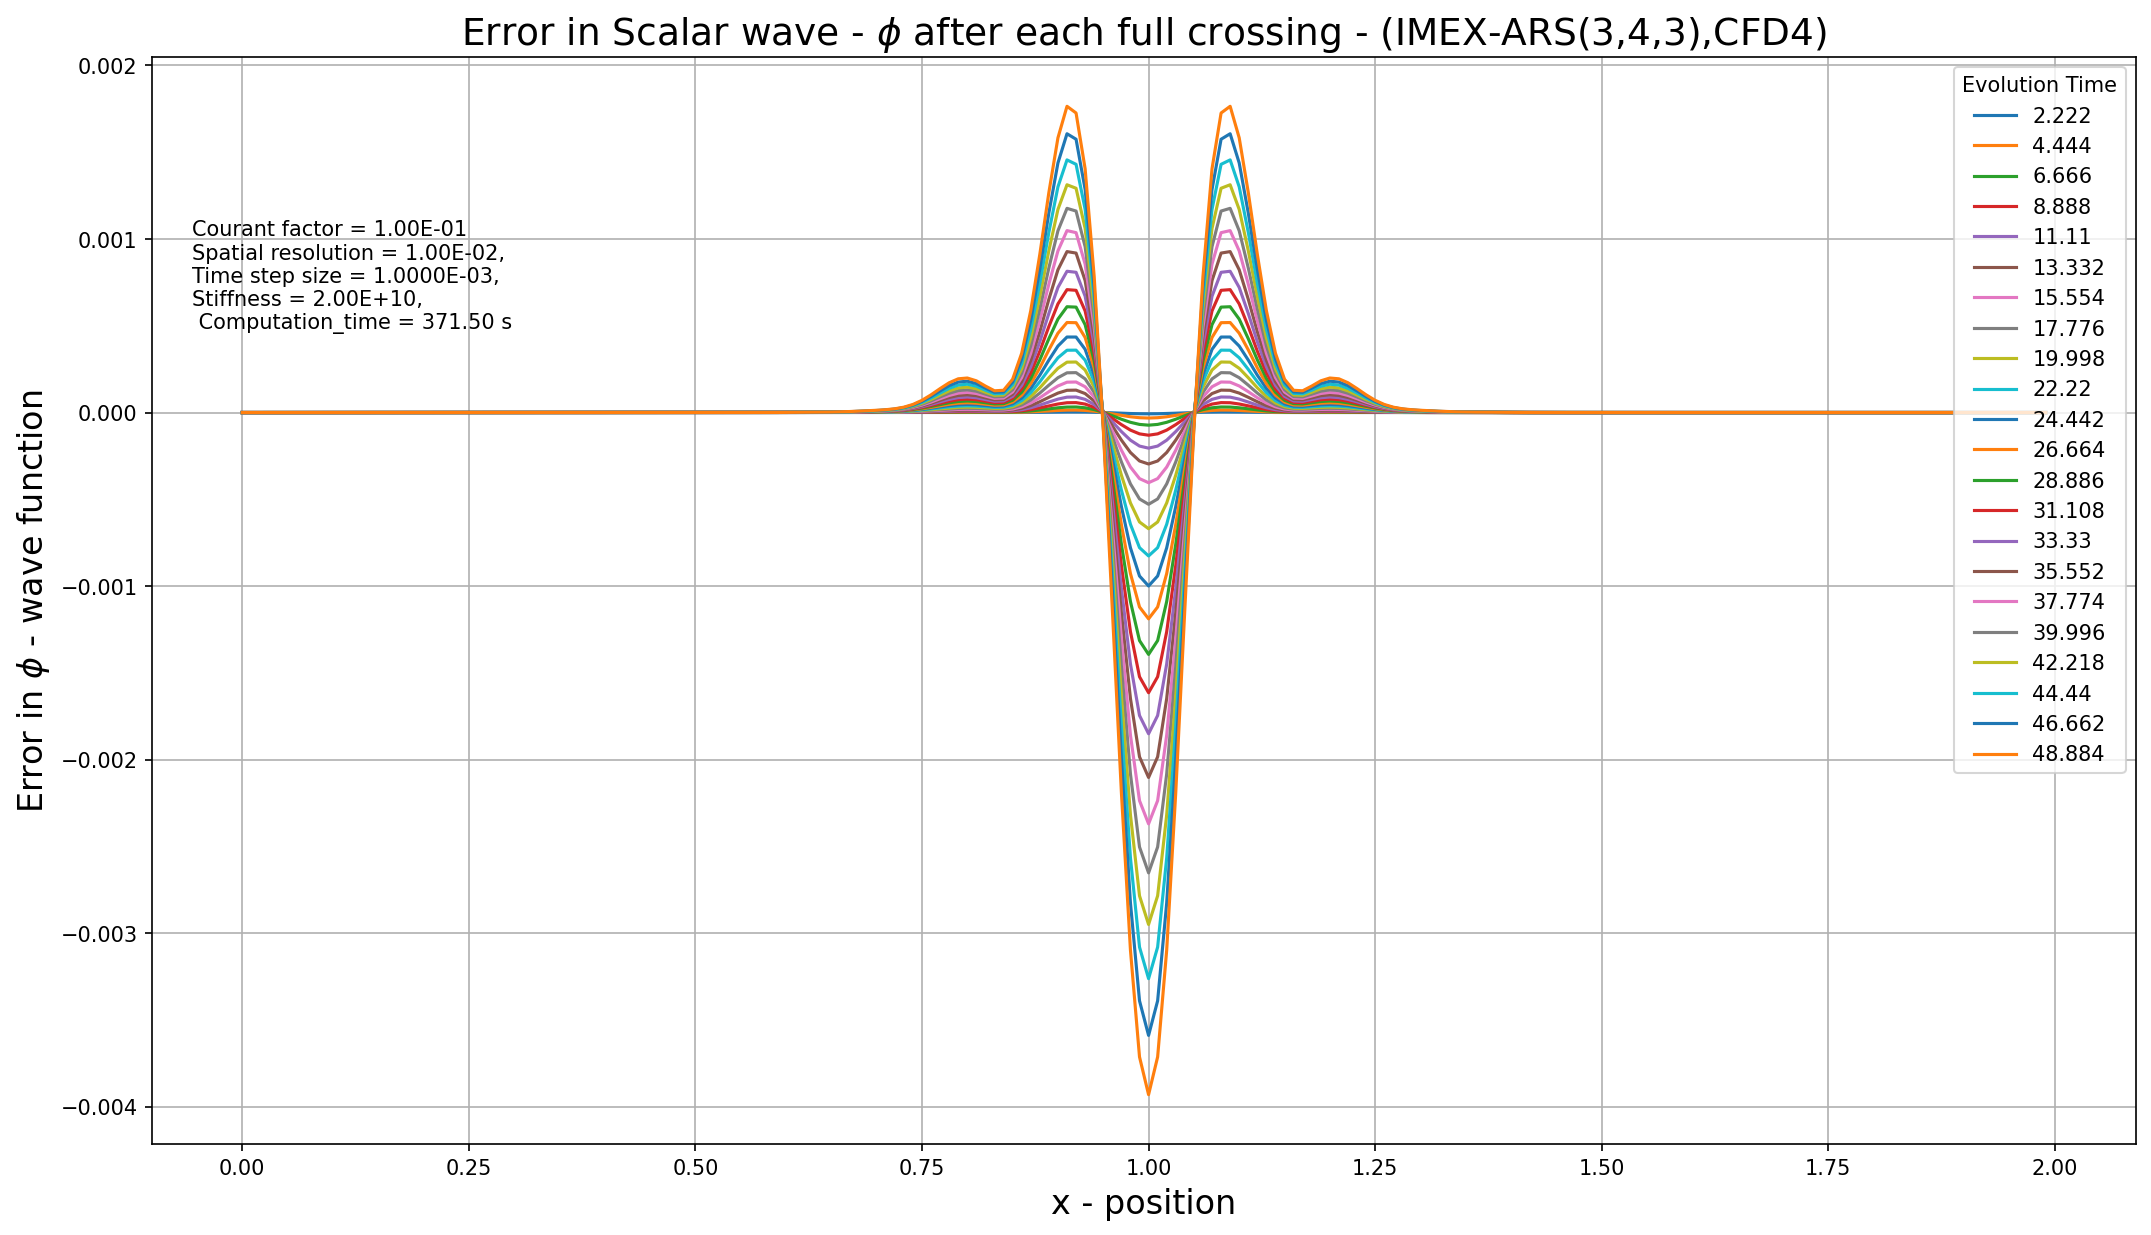

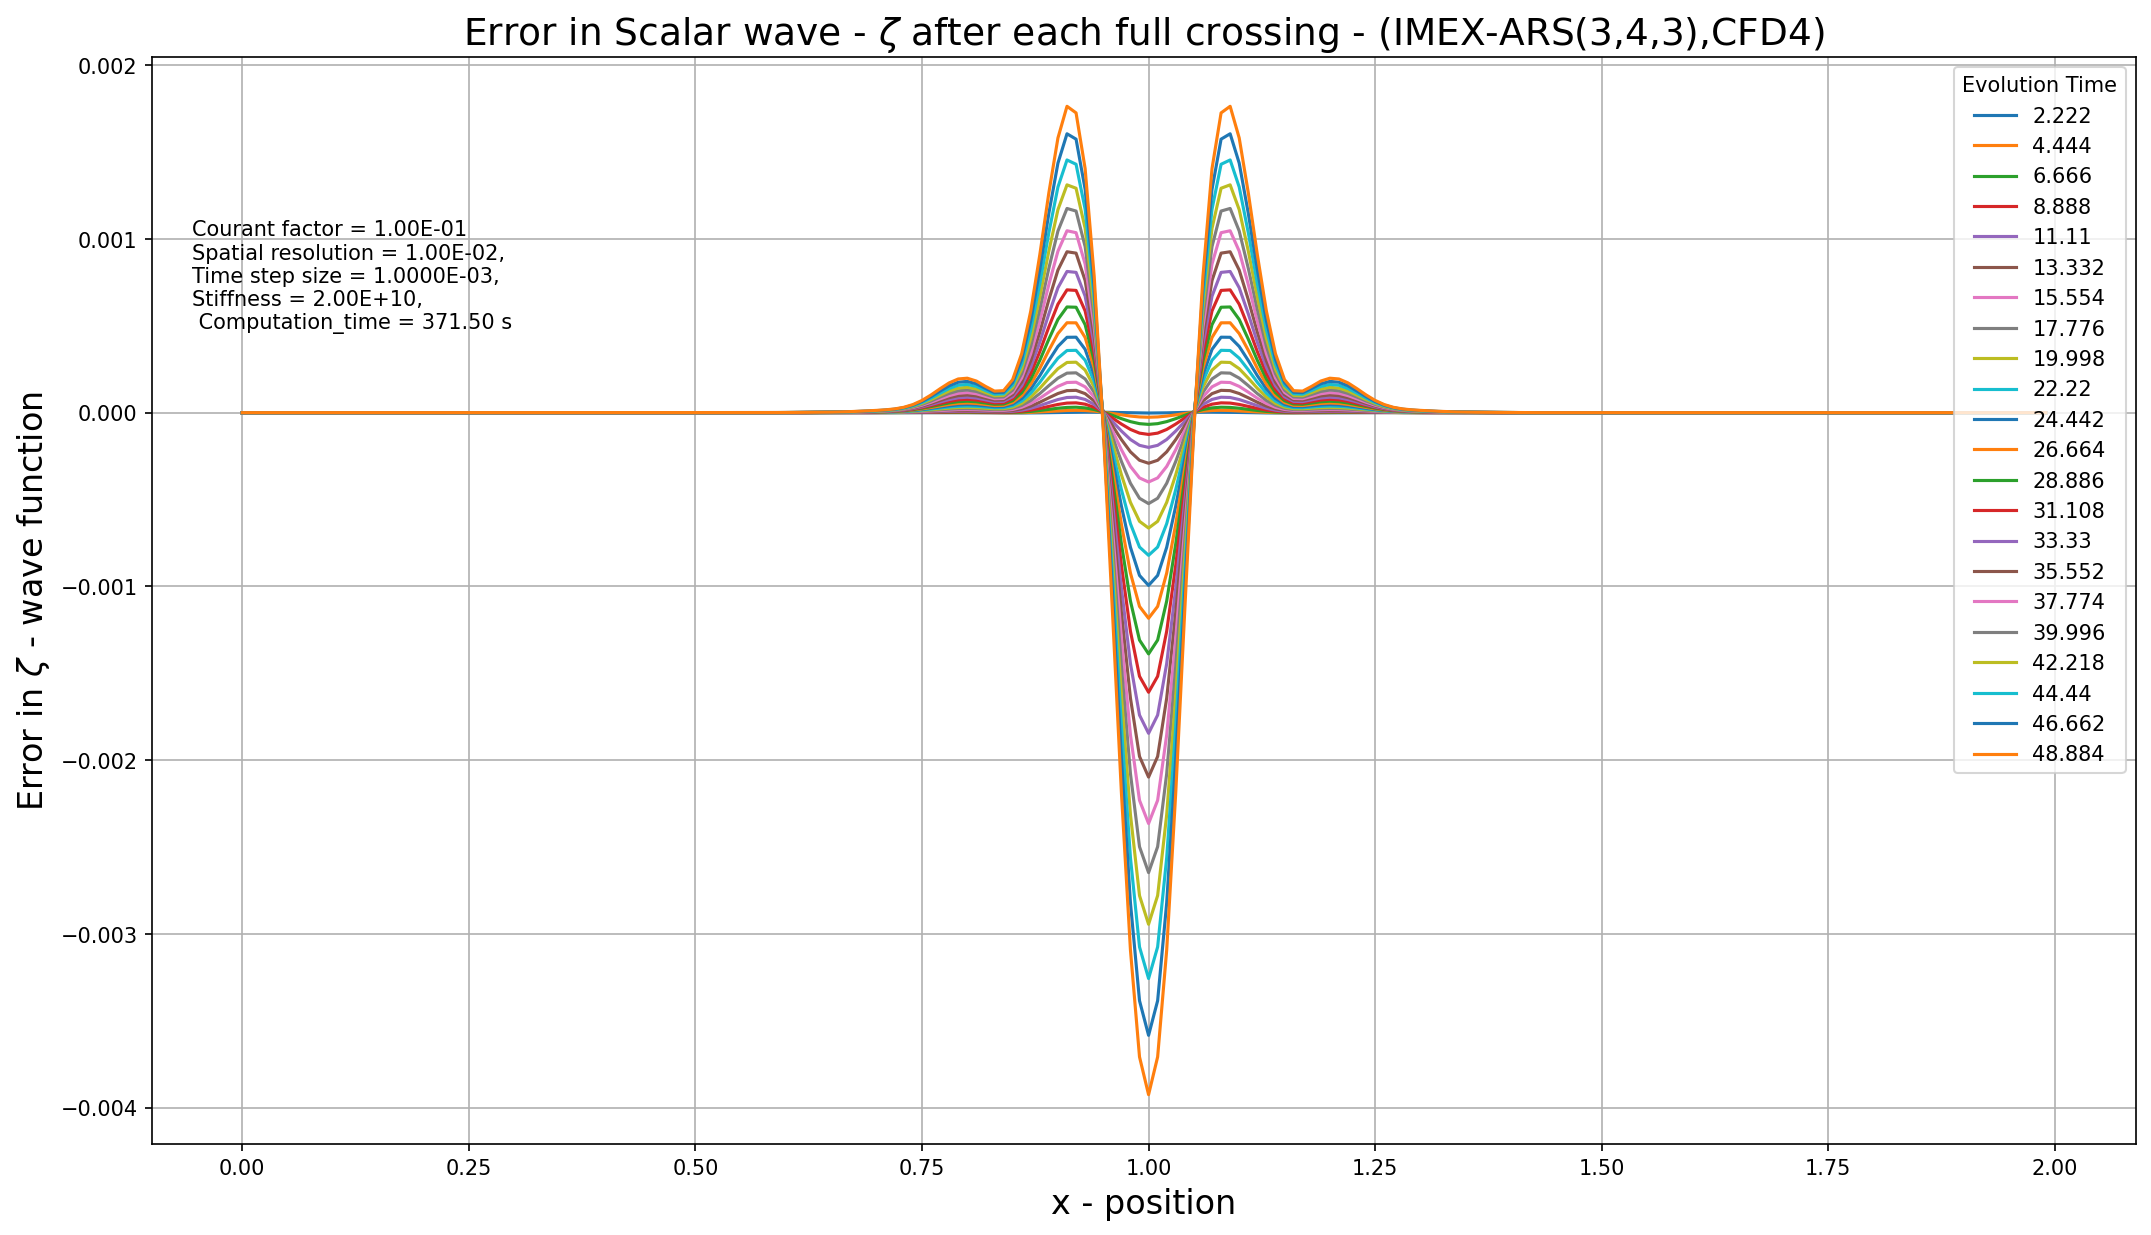

In [16]:
def find_crossing_data(wave_speed,roundoff):
    two_full_crossing_time = ( x_start + x_length )/wave_speed
    two_full_crossing_iter = (np.where(np.isclose(two_full_crossing_time,var_t,roundoff))[0])[1] # or int(two_full_crossing_time/dt)
    if (np.round(var_t[two_full_crossing_iter],15) != two_full_crossing_time):
        print("Exact crossing time does not exists. t[end_point]=%0.4f"%var_t[two_full_crossing_iter])
    return two_full_crossing_time,two_full_crossing_iter
#crossing_time_phi,crossing_iter_phi = find_crossing_data(wave_speed_phi,1E-3)
# crossing_time_zeta,crossing_iter_zeta = find_crossing_data(wave_speed_zeta,1E-4)
two_full_crossing_time,two_full_crossing_iter = find_crossing_data(wave_speed_phi,1E-3)
#Error
total_crossings = int(t_end/two_full_crossing_time - 0)
crossing_times = np.zeros(total_crossings)
error_phi = np.zeros((total_crossings,Nx))
error_zeta = np.zeros((total_crossings,Nx))
#phi_result[0,:]

j = two_full_crossing_iter
for i in range (total_crossings):
    error_phi[i] = phi_Nsoln[j] - phi_Nsoln[0]
    error_zeta[i] = zeta_Nsoln[j] - zeta_Nsoln[0]
    crossing_times[i] = var_t[j]
    j = j + two_full_crossing_iter
crossing_times = np.round(crossing_times,4)


def plot_crossing_time_error(title,x_label,y_label,x_param,y_param):
    fig_dpi = 150
    fig, ax = plt.subplots(figsize=(2560/fig_dpi,1440/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=18)
    plt.xlabel(x_label,fontsize=16)
    plt.ylabel(y_label,fontsize=16)
    plt.plot(x_param,y_param,label="crossing times")
    plt.legend(crossing_times,title="Evolution Time",loc='upper right')
    plt.text(0.02, 0.75,
             'Courant factor = %0.2E\nSpatial resolution = %.2E,\nTime step size = %.4E,\nStiffness = %.2E,\n Computation_time = %.2f s'
             %(Courant_factor,dx,dt,stiffness,comp_time),transform=ax.transAxes)
    plt.grid(axis="both")
    plt.show()
plot_crossing_time_error(r'Error in Scalar wave - $\phi$ after each full crossing - (%s,%s)'%(time_integration_method,finite_difference_method),
      "x - position",r'Error in $\phi$ - wave function',
      var_x,np.transpose(error_phi))
plot_crossing_time_error(r'Error in Scalar wave - $\zeta$ after each full crossing - (%s,%s)'%(time_integration_method,finite_difference_method),
      "x - position",r'Error in $\zeta$ - wave function',
      var_x,np.transpose(error_zeta))

In [17]:
# #Save phi,zeta-data after each two crossings

# ###------------------------------------------------###
# phi_cross = np.zeros((Nx,len(crossing_times)+1))
# phi_cross = np.transpose(phi_cross)
# zeta_cross = np.zeros((Nx,len(crossing_times)+1))
# zeta_cross = np.transpose(zeta_cross)
# j = 0
# for i in range (0,int(Nt),int(two_full_crossing_iter)):
#     phi_cross[j] = phi_Nsoln[i]
#     zeta_cross[j] = zeta_Nsoln[i]
#     j = j+1
# # np.save("phi_crossings,Nx=%d,t=(%0.1f,%0.1f),x_s,x_l=(%0.1f,%0.1f)"
# #         %(Nx,t_start,t_end,x_start,x_length),phi_cross)
# ###------------------------------------------------###

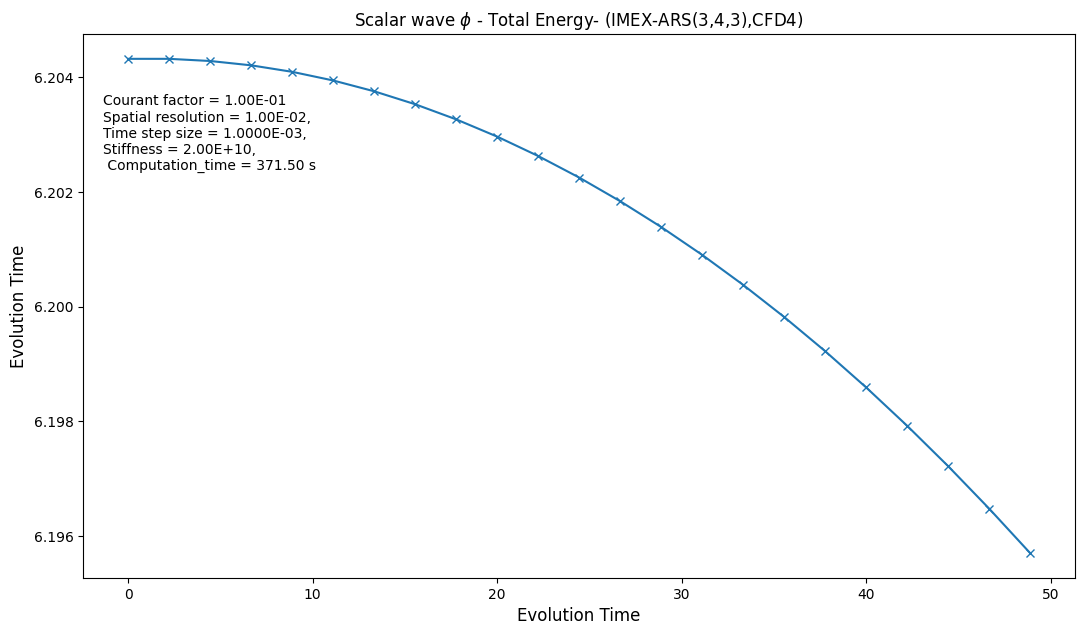

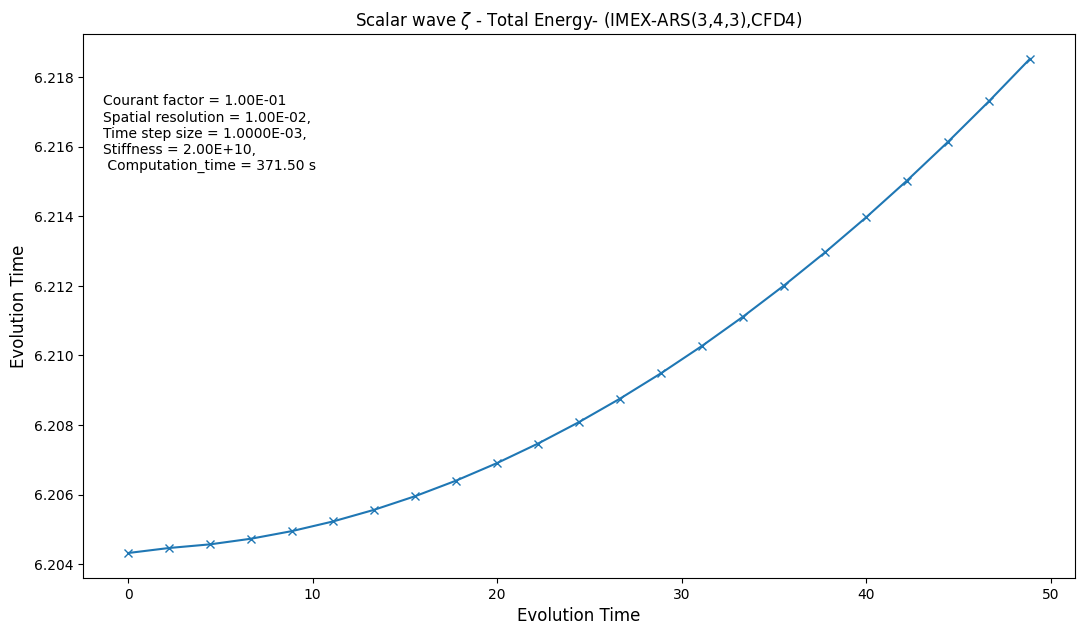

In [18]:
# Test for energy conservation

phi_var = np.zeros((total_crossings+1,Nx))
phi_dot_var = np.zeros((total_crossings+1,Nx))
phi_prime_var = np.zeros((total_crossings+1,Nx))
energy_density_phi = np.zeros((total_crossings+1,Nx))
total_energy_phi = np.zeros((total_crossings+1))

zeta_var = np.zeros((total_crossings+1,Nx))
zeta_dot_var = np.zeros((total_crossings+1,Nx))
zeta_prime_var = np.zeros((total_crossings+1,Nx))
energy_density_zeta = np.zeros((total_crossings+1,Nx))
total_energy_zeta = np.zeros((total_crossings+1))

j = 0
for i in range (0,int(Nt),int(two_full_crossing_iter)):
    phi_var[j] = u_Nsoln[:,0][i]
    phi_dot_var[j] = u_Nsoln[:,1][i]
    zeta_var[j] = u_Nsoln[:,2][i]
    zeta_dot_var[j] = u_Nsoln[:,3][i]
    j = j+1

# phi_prime -> first order derivative w.r.t 'x' to be computed
def first_order_derivative(var,dx):
    D1_var = np.zeros(Nx)
    var_with_ghosts = exterior_points_CFD2(var)
    for i in range (1,len(var_with_ghosts)-1):
        # Central finite difference method:
        D1_var[i-1] = (var_with_ghosts[i+1] - var_with_ghosts[i-1])/(2*dx)
    return D1_var

for i in range (total_crossings+1):
    phi_prime_var[i] = first_order_derivative(phi_var[i],dx)
    zeta_prime_var[i] = first_order_derivative(zeta_var[i],dx)
    
# Calculate total energy -> 1/2*phi_dot^2 + 1/2*phi_prime^2

for i in range (total_crossings+1):
    energy_density_phi[i] = 1/2*( (phi_dot_var[i])**2 + (phi_prime_var[i])**2 )
    energy_density_zeta[i] = 1/2*( (zeta_dot_var[i])**2 + (zeta_prime_var[i])**2 )
    
    
# Calculate energy density -> integrate Energy function along x-axis

# def integrate_simpson(h,param_y): #Ref: https://atozmath.com/example/CONM/NumeInte.aspx?he=e&q=S13
#     t1,t2 = 0,0
#     for i in range (1,len(param_y)-1): 
#         if (i%2 == 1): #odd integers
#             t1 = t1 + param_y[i]
#             #print("t1[i]",i)
#         #print(t1)
#         if (i%2 == 0) : #even integers
#             t2 = t2 + param_y[i]
#             #print("t2[i]",i)
#         #print(t2)
#     integral = (h/3)*(param_y[0] + 4*t1 + 2*t2 + param_y[len(param_y)-1] )
#     return integral

def discrete_pointwise_integration(h,param_y):
    # sum(param_y*dx) over all points
    integral = 0
    for i in range (len(param_y)):
        integral = param_y[i]*h + integral
    return integral


for i in range (total_crossings+1):
    total_energy_phi[i] = discrete_pointwise_integration(dx,energy_density_phi[i])
    total_energy_zeta[i] = discrete_pointwise_integration(dx,energy_density_zeta[i])
    
def plot_energy_conservation(title,xlabel,ylabel,x_param,y_param):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(xlabel,fontsize=12)
    plt.plot(x_param,y_param,"-x")
    plt.text(0.02, 0.75,
             'Courant factor = %0.2E\nSpatial resolution = %.2E,\nTime step size = %.4E,\nStiffness = %.2E,\n Computation_time = %.2f s'
             %(Courant_factor,dx,dt,stiffness,comp_time),transform=ax.transAxes)
    plt.show

plot_energy_conservation(r'Scalar wave $\phi$ - Total Energy- (%s,%s)'%(time_integration_method,finite_difference_method),'Evolution Time',r'Total energy of $\phi$',
                        np.append(0,crossing_times),total_energy_phi)

plot_energy_conservation(r'Scalar wave $\zeta$ - Total Energy- (%s,%s)'%(time_integration_method,finite_difference_method),'Evolution Time',r'Total energy of $\zeta$',
                        np.append(0,crossing_times),total_energy_zeta)

In [19]:
# # Produce frames to render movie

# import multiprocessing

# def plots(pl):
#     ii = pl[0]
#     fc = pl[1]
#     fig_dpi = 100
#     fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
#     plt.title('Coupled scalar waves evolution - (%s,%s)'
#               %(time_integration_method,finite_difference_method),fontsize=12)
#     plt.xlabel("x - coordinates",fontsize=10)
#     plt.ylabel(r'$\phi$, $\zeta$ Amplitude',fontsize=10)
#     ax.axis([-0.1,2.1,-0.5,1.5])
#     plt.grid(axis="both")
#     plt.plot(var_x,phi_Nsoln[ii],'-')
#     plt.plot(var_x,zeta_Nsoln[ii],'--')
#     plt.legend([r'$\phi$ w/ $C_{\phi}=%0.2f$'%wave_speed_phi,r'$\zeta$ w/ $C_{\zeta}=%0.2f$'
#                 %wave_speed_zeta],title="Variable",loc='upper right',fontsize=12)
#     plt.text(0.02, 0.75,
#              'Time = %.4f,\n\nCourant factor = %0.2f\nSpatial resolution = %.2E,\nTime step size = %.4E,\nStiffness = %.2E,\n Computation_time = %.2f s'
#              %(var_t[ii],Courant_factor,dx,dt,stiffness,comp_time),transform=ax.transAxes)
#     plt.savefig("plots_tmp/plot%05d.png"%fc)
#     plt.close(fig)
    
# iter_v = np.arange(0,len(var_t),int((Nt-1)/800)) #produce 800 frames.Max frame count:800
# frame_count = np.arange(0,len(iter_v),1)
# pl = np.zeros((len(frame_count),2),dtype=int)
# pl[:,0] = iter_v
# pl[:,1] = frame_count
# print("Total number of frames to be rendered: %d"%len(frame_count))

# # multiprocessing to render frames
# pool = multiprocessing.Pool(processes=3) #total 4 procs, 8 threads
# %time pool_return = pool.map(plots,pl)

# ## ffmpeg -framerate 24 -start_number 00000 -i plot%05d.png ../scalar_wave_40.mp4

Total number of frames to be rendered: 807
CPU times: user 12.2 ms, sys: 4 ms, total: 16.2 ms
Wall time: 1min 53s
